# Финальное задание курса

В итоговом задании курса мы предлагаем вам решить задачу регрессии - по характеристикам поездок на такси в Нью-Йорке научиться определять их стоимость.

В задании две части:

* первая часть - обычная. Так устроены все ноутбуки с домашними заданиями в курсе. Мы что-то просим - вы делаете. Задания этой части как обычно проверяются тестами на Stepik

* вторая часть - творческая. В этой части мы даем вам лишь идеи того, что можно сделать, а все остальное - на вас. Это задание проверяется в виде текстового отчета (подробности смотрите в описании второй части задания)

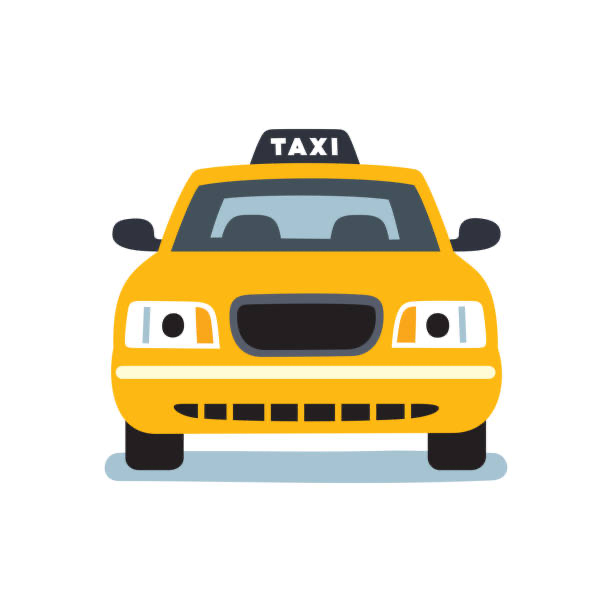

# Часть 1

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Считаем данные

In [6]:
df = pd.read_csv("https://www.dropbox.com/s/glmbcyopi24m2ni/final_project_data.csv?dl=1")

df.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
0,2011-11-23 14:36:35.0000003,2011-11-23 14:36:35 UTC,-73.959075,40.783316,-73.959087,40.783345,1.0,2.5
1,2013-09-14 21:40:00.00000016,2013-09-14 21:40:00 UTC,-73.931612,40.771060,-73.929097,40.760542,1.0,5.5
2,2012-04-30 18:13:19.0000002,2012-04-30 18:13:19 UTC,-73.997929,40.740983,-74.007197,40.727725,2.0,6.5
3,2010-10-22 15:03:47.0000001,2010-10-22 15:03:47 UTC,-73.980608,40.742449,-73.985609,40.755807,1.0,6.5
4,2011-02-18 18:08:16.0000002,2011-02-18 18:08:16 UTC,-74.008884,40.720314,-73.983280,40.722350,1.0,12.1


## Исследование данных

### Quiz

Сколько строк в таблице df?

In [3]:
# ваш код здесь
df.shape

(615962, 8)

### Quiz

Есть ли пропущенные значения в таблице? В скольких столбцах есть пропуски?

In [4]:
# ваш код здесь
df.isnull().sum()

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      1
dropoff_longitude    3
dropoff_latitude     3
passenger_count      1
fare_amount          1
dtype: int64

### Quiz

Удалите строки с пропущенными значениями из таблицы. Сколько строк осталось в таблице?

In [7]:
# ваш код здесь
df = df.dropna()

In [6]:
df.shape

(615959, 8)

Удалите из данных колонку `key`, так как в ней дублируется информация из `pickup_datetime`

In [8]:
# ваш код здесь
df = df.drop(columns = ['key'])

Обработайте колонку `pickup_datetime`. Выделите из нее 4 новых столбца:

* `year` - год поездки
* `month` - месяц поездки
* `day` - день поездки
* `hour` - час поездки. Час вычисляйте так: если до следующего часа осталось меньше 30 минут (на секунды не смотрим), что час округляете до следующего.

Пример: 14:18:20 -> 14 часов, 17:48:29 -> 18 часов

Затем удалите столбец `pickup_datetime`.



In [9]:
# ваш код здесь
df['year'] = pd.to_datetime(df['pickup_datetime']).dt.year

In [10]:
df['month'] = pd.to_datetime(df['pickup_datetime']).dt.month
df['day'] = pd.to_datetime(df['pickup_datetime']).dt.day

In [11]:
df['ho'] = pd.to_datetime(df['pickup_datetime']).dt.hour

In [12]:
df['minute'] = pd.to_datetime(df['pickup_datetime']).dt.minute

In [13]:
df['hour'] = 0

In [14]:
for i in df.index:
  if df['minute'][i] > 30:
    df['hour'][i] = df['ho'][i] + 1
  else:
    df['hour'][i] = df['ho'][i]

<ipython-input-14-1fc41aa45e5c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'][i] = df['ho'][i] + 1
<ipython-input-14-1fc41aa45e5c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'][i] = df['ho'][i]


In [15]:
df1 = df.drop(columns = ['minute', 'ho', 'pickup_datetime'])

## Вопросы по данным

### Quiz

В какие годы совершались поездки?

In [15]:
# ваш код здесь
df1['year'].value_counts()

2012    99060
2011    97898
2013    96329
2009    94465
2010    93419
2014    92051
2015    42737
Name: year, dtype: int64

In [58]:
df1['day'].value_counts()

16    21078
10    20961
12    20912
13    20899
18    20886
17    20843
14    20839
15    20829
9     20813
20    20789
19    20785
7     20777
8     20734
11    20646
22    20603
23    20355
21    20278
24    20239
6     20209
5     19876
28    19792
4     19679
3     19485
25    19366
26    19327
27    19311
2     19050
1     18912
29    18301
30    17886
31    11499
Name: day, dtype: int64

### Quiz

В какой час было совершено больше всего поездок?

In [16]:
# ваш код здесь
df1['hour'].value_counts()

19    38614
20    37536
21    35666
22    34962
18    34911
23    32451
15    30996
14    30520
12    30083
13    30003
9     28772
10    27864
11    27821
16    27312
17    26607
8     26038
1     20764
7     17857
2     15608
24    13989
0     13441
3     11345
4      8789
6      8392
5      5618
Name: hour, dtype: int64

### Quiz

В какой сезон (зима, весна, лето, осень) было совершено наименьшее число поездок?

In [17]:
# ваш код здесь
df1['month'].value_counts()

3     58039
5     57758
4     56445
6     55417
1     54827
2     52204
10    49656
9     47044
12    46942
7     46723
11    46673
8     44231
Name: month, dtype: int64

In [18]:
df1[df1['month'].isin([1,2,12])]['month'].count() # зима

153973

In [19]:
df1[df1['month'].isin([3,4,5])]['month'].count() # весна

172242

In [20]:
df1[df1['month'].isin([6,7,8])]['month'].count() # лето

146371

In [21]:
df1[df1['month'].isin([9,10,11])]['month'].count() # осень

143373

Постройте scatter plot в осях `pickup_latitude` и `pickup_longitude`

In [ ]:
# ваш код здесь


### Quiz

Постройте ящик с усами boxplot для `pickup_longitude`. Есть ли на визуализации выбросы? (отдельные точки)

In [ ]:
# ваш код здесь

### Quiz

Чему равна медиана `pickup_longitude`? Ответ округлите до тысячных.

In [22]:
# ваш код здесь
df1['pickup_longitude'].median()

-73.981803

Постройте гистограмму распределения признака `hour`.

In [ ]:
# ваш код здесь

## Построение baseline-модели

Разбейте `df` на матрицу объект-признак `X` и вектор с целевой переменной `y`. Целевая переменная - столбец `fare_amount`.

In [59]:
df1['day'].value_counts()

16    21078
10    20961
12    20912
13    20899
18    20886
17    20843
14    20839
15    20829
9     20813
20    20789
19    20785
7     20777
8     20734
11    20646
22    20603
23    20355
21    20278
24    20239
6     20209
5     19876
28    19792
4     19679
3     19485
25    19366
26    19327
27    19311
2     19050
1     18912
29    18301
30    17886
31    11499
Name: day, dtype: int64

In [16]:
# ваш код здесь
X = df1.drop(columns = ['fare_amount'])

Разбейте данные на тренировочную и тестовую части с помощью train_test_split.

Тестовая часть - 25% всех данных, `random_state=42`.

Сколько строк в матрице `X_train`?

In [17]:
# ваш код здесь
y = df1[['fare_amount']]

In [60]:
X['day'].value_counts()

16    21078
10    20961
12    20912
13    20899
18    20886
17    20843
14    20839
15    20829
9     20813
20    20789
19    20785
7     20777
8     20734
11    20646
22    20603
23    20355
21    20278
24    20239
6     20209
5     19876
28    19792
4     19679
3     19485
25    19366
26    19327
27    19311
2     19050
1     18912
29    18301
30    17886
31    11499
Name: day, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

In [26]:
Xtrain.shape

(461969, 9)

### Quiz

Обучите решающее дерево глубины 3 на тренировочных данных и вычислите ошибку $R^2$ на тесте. Ответ округлите до сотых.

Зафиксируйте у дерева `random_state=42`.

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# ваш код здесь
tree = DecisionTreeRegressor(max_depth = 3, random_state=42)
tree.fit(Xtrain, ytrain)
pr = tree.predict(Xtest)

In [28]:
r2_score(ytest, pr)

0.4998349394485503

### Quiz

Постройте гистограмму важности признаков.

Какой признак имеет наибольший вес?

In [29]:
# ваш код здесь
importances = tree.feature_importances_
print(importances)

[0.31174679 0.05099006 0.63726315 0.         0.         0.
 0.         0.         0.        ]


In [30]:
indices = np.argsort(importances)[::-1]
feature_names = df1.columns

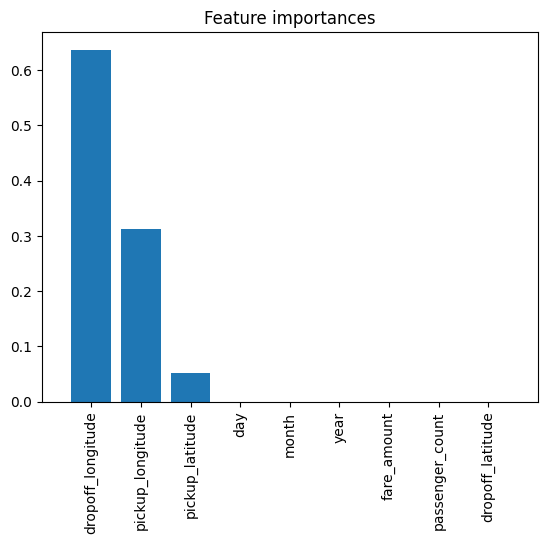

In [31]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(feature_names)[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

## Улучшение модели

### Quiz

Постройте гистограмму распределения целевой переменной `y`, укажите параметр `bins=100`.

Является ли распределение нормальным?

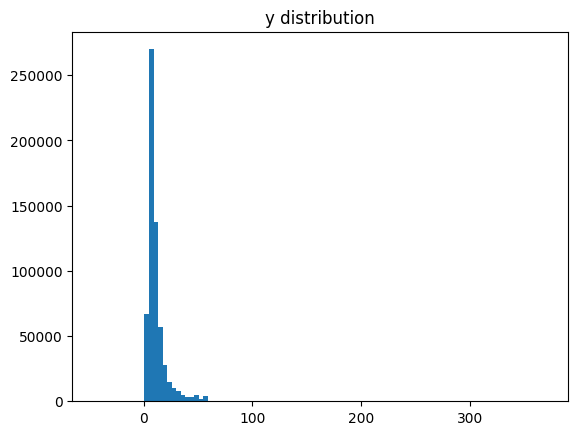

In [32]:
# ваш код здесь
plt.figure()
plt.title("y distribution")
plt.hist(y, bins = 100)
plt.show()

Замените все значения $y$, меньшие 0, на 0.

Сделайте преобразование целевой переменной по правилу $y_{new} = np.log1p(y)$

Заново разбейте данные на тренировочную и тестовую часть по тем же правилам, что и раньше, но теперь используйте `X` и `y_new`.

In [ ]:
# ваш код здесь


### Quiz

Заново обучите решающее дерево глубины 3 с `random_state=42` на тренировочных данных и вычислите $R^2$ на тесте. Ответ округлите до сотых.

Перед вычислением $R^2$ сделайте обратное преобразование от прогноза: `np.expm1(pred)` и от `y_test`.

**Важно:** дальше мы будем работать с преобразованной целевой переменной, поэтому при вычислении $R^2$ во всех заданиях ниже делайте обратное преобразование.

In [33]:
# ваш код здесь
y = np.where(y<0,0,y)
y_new = np.log1p(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.25, random_state=42)
tree_model_log = DecisionTreeRegressor(max_depth=3,random_state=42)
tree_model_log.fit(X_train,y_train)
pred=tree_model_log.predict(X_test)
pred_act=np.expm1(pred)
y_test_act = np.expm1(y_test)
r2_score(y_test_act,pred_act)

0.44346012656908707

In [19]:
y = np.where(y<0,0,y)
y_new = np.log1p(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.25, random_state=42)

### Quiz


Подберите по кросс-валидации на тренировочных данных глубину дерева в диапазоне от 3 до 10 включительно с шагом 1 (`random_state=42`).

`cv=3, scoring=r2`

Затем примените модель с оптимальной глубиной на тесте и вычислите $R^2$. Ответ округлите до сотых.

Перед вычислением $R^2$ не забудьте (как и дальше) делать преобразование `np.expm1`

In [34]:
# ваш код здесь
from sklearn.model_selection import GridSearchCV

params = {'max_depth' : range(3,11,1)}

gs = GridSearchCV(DecisionTreeRegressor(random_state=42), params, cv=3, scoring='r2')

gs.fit(Xtrain, ytrain)

gs.best_score_, gs.best_estimator_

(0.6750897722968211, DecisionTreeRegressor(max_depth=10, random_state=42))

In [35]:
tree_best = DecisionTreeRegressor(max_depth=10, random_state=42)
tree_best.fit(Xtrain, ytrain)
pr = tree_best.predict(Xtest)
r2_score(ytest, pr)

0.6851301787193926

## Усложнение пайплайна

Создайте pipeline, в котором сначала извлеките полиномиальные признаки степени 2 из данных, а затем обучите решающее дерево глубины 3 с `random_state=42`.

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

p1 = Pipeline([
    ('features', PolynomialFeatures(degree=2)),
    ('model', DecisionTreeRegressor(max_depth=3, random_state=42))
])

### Quiz

Обучите pipeline на тренировочных данных, сделайте прогноз на тесте и вычислите $R^2$. Ответ округлите до сотых.

In [37]:
# ваш код здесь
p1.fit(X_train, y_train)
pred = p1.predict(X_test)
# r2_score(ytest, pr)
pred_act=np.expm1(pred)
y_test_act = np.expm1(y_test)
r2_score(y_test_act,pred_act)

0.41732314222165745

При помощи GridSearchCV с теми же гиперпараметрами, что и раньше, подберите глубину дерева внутри пайплайна в диапазоне от 3 до 10 включительно с шагом 1.

In [38]:
# ваш код здесь
params = {'model__max_depth' : range(3,11,1)}

gs = GridSearchCV(p1, params, cv=3, scoring='r2')

gs.fit(X_train, y_train)

gs.best_score_, gs.best_estimator_

(0.66586163226547,
 Pipeline(steps=[('features', PolynomialFeatures()),
                 ('model',
                  DecisionTreeRegressor(max_depth=10, random_state=42))]))

In [39]:
p1 = Pipeline([
    ('features', PolynomialFeatures(degree=2)),
    ('model', DecisionTreeRegressor(max_depth=10, random_state=42))
])
best = p1.fit(X_train, y_train)

In [40]:
pred = p1.predict(X_test)
pred_act=np.expm1(pred)
y_test_act = np.expm1(y_test)
r2_score(y_test_act,pred_act)

0.7149803521718521

### Quiz

Выведите $R^2$ лучшего результата на тесте. Ответ округлите до сотых.

In [ ]:
# ваш код здесь

## Feature selection

Добавьте в предыдущий пайплайн:
* после добавления полиномиальных признаков - StandardScaler
* затем - снижение размерности при помощи метода `SelectFromModel` с моделью `Ridge` с гиперпараметрами по умолчанию.

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, Ridge

# ваш код здесь
p1 = Pipeline([
    ('features', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('selector', SelectFromModel(estimator=Ridge(random_state=42))),
    ('model', DecisionTreeRegressor(max_depth=10, random_state=42))
])
best = p1.fit(X_train, y_train)

Обучите пайплайн на тренировочных данных, сделайте прогноз на тесте и вычислите для него $R^2$.

In [43]:
# ваш код здесь
pred = p1.predict(X_test)
pred_act=np.expm1(pred)
y_test_act = np.expm1(y_test)
r2_score(y_test_act,pred_act)

0.6698534940345506

Подберите глубину решающего дерева в пайплайне, в том же диапазоне и теми же гиперпараметрами GridSearch, что и в предыдущих заданиях.

Вычислите $R^2$ на тестовых данных, ответ округлите до сотых.

In [ ]:
# ваш код здесь

In [ ]:
# ваш код здесь

### Quiz

Удалось ли при помощи пайплайна с отбором признаков улучшить результат предыдущей лучшей модели?

## Кодирование категориальных признаков

Признаки `month`, `day`, `hour` - категориальные (подумайте почему!)

Поэтому их можно попробовать закодировать.

Попробуем подход: группировка значений признака + дальнейшая OneHot-кодировка.

* Создайте колонки `winter`, `spring`, `summer`, `autumn` - в каждую из которых пишите 1, если месяц относится к сезону, и 0 иначе.

* Создайте колонки `start_month`, `middle_month`, `end_month` - в каждую колонку пишите 1, если день относится к началу месяца (1-10 число), середине месяца (11-20 число), концу месяца (от 21 числа), и 0 иначе.

* Создайте колонки `night`, `morning`, `day`, `evening` по аналогии. Если час - от 23 до 5, то это `night`, от 6 до 11 - `morning`, от 12 до 16 - `day`, от 17 до 22 - `evening`.

После создания новых колонок удалите колонки `month`, `day`, `hour`.

P.S. Отдельно делайте преобразования для X_train и для X_test, чтобы заново не разбивать данные.

In [90]:
y = np.where(y<0,0,y)
y_new = np.log1p(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.25, random_state=42)

In [91]:
# seasons
X_train['season'] = ''
season = [[12,1,2], [3,4,5], [6,7,8], [9,10,11]]
for i in X_train.index:
  if X_train['month'][i] in season[0]:
    X_train['season'][i] = 'winter'

<ipython-input-91-f8f19290c2c8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['season'][i] = 'winter'


In [92]:
for i in X_train.index:
  if X_train['month'][i] in season[1]:
    X_train['season'][i] = 'spring'
  elif X_train['month'][i] in season[2]:
    X_train['season'][i] = 'summer'
  elif X_train['month'][i] in season[3]:
    X_train['season'][i] = 'autumn'

<ipython-input-92-e8e78634c2f4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['season'][i] = 'autumn'
<ipython-input-92-e8e78634c2f4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['season'][i] = 'spring'
<ipython-input-92-e8e78634c2f4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['season'][i] = 'summer'


In [93]:
X_train['season'] = X_train['season'].astype("category")

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(X_train)
X_train = pd.DataFrame(enc.transform(X_train).toarray())

In [86]:
X_train

<461969x445510 sparse matrix of type '<class 'numpy.float64'>'
	with 4619690 stored elements in Compressed Sparse Row format>

In [64]:
X_train['winter'] = 0
X_train['spring'] = 0
X_train['summer'] = 0
X_train['autumn'] = 0
#-----------------------
X_train['start_month'] = 0
X_train['middle_month'] = 0
X_train['end_month'] = 0
#------------------------
X_train['night'] = 0
X_train['morning'] = 0
X_train['day_new'] = 0
X_train['evening'] = 0

In [66]:
# ваш код здесь
dict_winter = {'1': [12, 1, 2]}
dict_spring = {'1': [3,4,5]}
dict_summer = {'1': [6,7,8]}
dict_autumn = {'1': [9,10,11]}

In [67]:
dict_start_month = {'1': range(1,11,1)}
dict_middle_month = {'1': range(11,21,1)}
dict_end_month = {'1': range(21,32,1)}

In [68]:
dict_night = {'1': [23,0,1,2,3,4,5]}
dict_morning = {'1': range(6,12,1)}
dict_day = {'1': range(12,17,1)}
dict_evening = {'1': range(17,23,1)}

In [69]:
X_train['winter'] = X_train['winter'].map(dict_winter)

In [70]:
X_train

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,winter,spring,summer,autumn,start_month,middle_month,end_month,night,morning,day_new,evening
537483,-73.984460,40.720162,-73.984322,40.731110,1.0,2011,9,10,18,NaN,0,0,0,0,0,0,0,0,0,0
543146,-73.937375,40.804540,-73.960572,40.807480,2.0,2013,3,18,20,NaN,0,0,0,0,0,0,0,0,0,0
575883,-73.925792,40.744198,-73.918459,40.765595,1.0,2010,12,21,10,NaN,0,0,0,0,0,0,0,0,0,0
66928,-74.003342,40.722141,-74.015869,40.715488,5.0,2015,2,14,11,NaN,0,0,0,0,0,0,0,0,0,0
164891,-73.991783,40.749656,-73.979164,40.740610,1.0,2011,9,29,15,NaN,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110269,-73.980885,40.774412,-74.004750,40.734807,1.0,2013,5,31,23,NaN,0,0,0,0,0,0,0,0,0,0
259179,-73.956220,40.778587,-73.980752,40.744727,1.0,2014,3,4,11,NaN,0,0,0,0,0,0,0,0,0,0
365839,-73.994867,40.740037,-74.004692,40.741732,1.0,2009,6,1,18,NaN,0,0,0,0,0,0,0,0,0,0
131933,-73.954971,40.780151,-73.972580,40.781116,3.0,2015,4,25,14,NaN,0,0,0,0,0,0,0,0,0,0


In [52]:
X_train['spring'] = X_train['spring'].replace(dict_spring)
X_train['summer'] = X_train['summer'].replace(dict_summer)
X_train['autumn'] = X_train['autumn'].replace(dict_autumn)
#-----------------------
X_train['start_month'] = X_train['start_month'].replace(dict_start_month)
X_train['middle_month'] = X_train['middle_month'].replace(dict_middle_month)
X_train['end_month'] = X_train['end_month'].replace(dict_end_month)
#------------------------
X_train['night'] = X_train['night'].replace(dict_night)
X_train['morning'] = X_train['morning'].replace(dict_morning)
X_train['day_new'] = X_train['day_new'].replace(dict_day)
X_train['evening'] = X_train['evening'].replace(dict_evening)

In [65]:
X_train['day'].value_counts()

10    15821
16    15761
12    15724
20    15720
15    15720
13    15685
14    15676
17    15615
18    15598
19    15585
7     15542
11    15540
9     15537
8     15487
22    15373
23    15329
6     15214
21    15173
24    15166
5     14957
28    14746
4     14722
3     14641
25    14526
26    14482
27    14457
2     14385
1     14218
29    13610
30    13353
31     8606
Name: day, dtype: int64

### Quiz

На сколько признаков стало больше в матрице-объект признак после добавления закодированных категориальных столбцов и удаления исходных категориальных столбцов?

Подберите при помощи GridSearch с теми же гиперпараметрами, что и выше, оптимальную глубину дерева в диапазоне от 3 до 10 включительно (с шагом 1). У дерева `random_state=42`.

In [ ]:
# ваш код здесь

Постройте гистограмму важности признаков для полученной модели (лучшей по GridSearch).

In [ ]:
# ваш код здесь

### Quiz

Какой из признаков, связанных с датой поездки, самый важный для модели?

## Кластеризация и визуализация

Оставьте только те строчки в таблице df (после удаления пропусков), для которых выполнены оба условия:

* `dropoff_latitude` $\in (39;41)$
* `dropoff_longitude` $\in (-75;-72)$

### Quiz

Сколько строк осталось в таблице?

In [27]:
# ваш код здесь
df = df.dropna()
df

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount,year,month,day,ho,minute,hour
0,2011-11-23 14:36:35 UTC,-73.959075,40.783316,-73.959087,40.783345,1.0,2.5,2011,11,23,14,36,15
1,2013-09-14 21:40:00 UTC,-73.931612,40.771060,-73.929097,40.760542,1.0,5.5,2013,9,14,21,40,22
2,2012-04-30 18:13:19 UTC,-73.997929,40.740983,-74.007197,40.727725,2.0,6.5,2012,4,30,18,13,18
3,2010-10-22 15:03:47 UTC,-73.980608,40.742449,-73.985609,40.755807,1.0,6.5,2010,10,22,15,3,15
4,2011-02-18 18:08:16 UTC,-74.008884,40.720314,-73.983280,40.722350,1.0,12.1,2011,2,18,18,8,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
615956,2013-12-01 00:21:40 UTC,-73.979049,40.736143,-73.980528,40.730353,1.0,5.5,2013,12,1,0,21,0
615957,2014-05-06 20:19:00 UTC,-73.976600,40.745290,-73.980242,40.759672,2.0,10.5,2014,5,6,20,19,20
615958,2012-01-31 00:16:00 UTC,-73.987750,40.745760,-73.953092,40.776787,1.0,10.9,2012,1,31,0,16,0
615959,2014-07-28 00:03:00 UTC,-73.983165,40.728207,-74.002797,40.728670,1.0,7.5,2014,7,28,0,3,0


In [28]:
X_train_1 = df[(df['dropoff_latitude'] > 39) & (df['dropoff_latitude'] < 41)]

In [29]:
X_train_2 = X_train_1[(X_train_1['dropoff_longitude'] > -75) & (X_train_1['dropoff_longitude'] < -72)]

In [30]:
X_train_2.shape

(603729, 13)

Разбейте все поездки по признакам `dropoff_latitude`, `dropoff_longitude` на 5 кластеров.

Используйте kmeans c `random_state=42`.

Визуализируйте поездки из таблицы df в осях `dropoff_latitude`, `dropoff_longitude` - покрасьте точки в цвета, соответствующие кластерам.

In [ ]:
# ваш код здесь

### Quiz

Для каждого кластера вычислите среднюю стоимость поездки.

Чему равна самая большая средняя стоимость поездки по кластерам? Ответ округлите до целого числа.

In [ ]:
# ваш код здесь

Отдельно нарисуйте кластер с наибольшей средней стоимостью поездки. В нем выделяется два островка.

In [ ]:
# ваш код здесь

### Quiz

Кластеризуйте точки этого кластера при помощи DBSCAN с гиперпараметрами `eps`=0.15, `min_samples`=10.

Нарисуйте результат.

Вычислите координаты центра (среднее арифметрическое) меньшего кластера.

В ответе укажите `dropoff_latitude`, округленную до тысячных.

In [ ]:
# ваш код здесь

# Часть 2

## Творческая (но обязательная) часть

В работе мы построили baseline-модель, потом попытались ее улучшить, усложнив пайплайн увеличением, а затем снижением размерности. Но попробовали мы лишь малую часть из всех возможных подходов, а также всего лишь одну модель - решающее дерево.

В этой части задания вам предлагается не ограничивать себя идеями, попробованными выше:
* придумывайте новые признаки
* пробуйте разные кодировки признаков
* снижайте размерность и делайте отбор признаков
* пробуйте разные модели
* комбинируйте подходы

У вас есть знания целого курса для работы над задачей, ни в чем вас не ограничиваем!

Ваша цель - построить модель, дающую наилучший скор $R^2$ на тестовых данных (с фиксированным разбиением на train-test, указанным в коде ноутбука выше).

In [ ]:
# ваш код здесь

### Итоговый отчет

Результаты исследований, проведенных в творческой части задания, оформите в виде отчета. Отчет - это текстовый документ (желательно, google docs - чтобы мы могли при ревью оставлять в нем комментарии), не ноутбук!

В отчете по пунктам должны быть отражены ваши действия при решении задачи:

1) Какие подходы попробовали - перечислить, описать

2) Какие подходы сработали, какие нет

3) Какой пайплайн дал наилучший результат? Какого качества удалось добиться?

4) Интерпретация важности признаков для наилучшего пайплайна. Какие признаки оказались наиболее важны для модели, какие нет? Как вы думаете почему?

Отчет пишется в свободной форме. В отчет можно включать визуализации, если считаете нужным.

Удачи!